In [21]:
import pandas as pd
import numpy as np 
from numpy import array
import matplotlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from numpy import array
from keras.models import Sequential
from keras.layers import Bidirectional
from keras.layers import TimeDistributed
from keras.layers import Dense, LSTM, Dropout, GRU
from keras.layers import Flatten
#from keras.layers.convolutional import Conv1D
from keras.layers import Conv1D
from keras.layers import ConvLSTM2D
from keras.layers import MaxPooling1D
from sklearn.model_selection import train_test_split
import statistics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from statsmodels.tsa.ar_model import AutoReg
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from math import sqrt
import time
from sklearn.preprocessing import MinMaxScaler
import math
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping

In [22]:
import warnings
warnings.filterwarnings("ignore")

In [23]:
rlrop = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=100)
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [24]:
columns = ['steps']
df = pd.read_csv('/Users/fatemeh/Thises/exprimentalResult/ActivityClassification/PMData_Analysis/Classification/3/MOX2_5_data_labelled.csv')

df = df[columns]
test_set = df
df.head()

,steps
0,9876
1,10074
2,11014
3,7656
4,12114


In [25]:
df.isna().sum()

steps    0
dtype: int64

In [26]:
training_set = df.values
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [27]:
x_train = []
y_train = []

In [28]:
train_size = int(len(training_set) * 0.8)
timestamp = len(training_set) - train_size

print (train_size, timestamp)

431 108


In [29]:
length = len(training_set)
for i in range(timestamp, length):
    x_train.append(training_set_scaled[i-timestamp:i, 0])
    y_train.append(training_set_scaled[i, 0])

In [30]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [31]:
n_steps = x_train.shape[1]
x_train = np.reshape(x_train, (x_train.shape[0], n_steps, 1))
n_features = 1
n_steps

108

In [32]:
def vanilla_LSTM(n_steps, n_features):
    # define model
    model = Sequential()
    model.add(LSTM(100, activation='relu', input_shape=(n_steps, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse',  metrics=['acc'])    #model.compile(loss='mae', optimizer='adam')
    return model


def mse_test(X, y, model, split = 0.2):
	X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = split)
	history = model.fit(X_train, y_train, epochs=500, batch_size=50, validation_data=(X_test, y_test), verbose= 2, shuffle=False)
	loss = (statistics.mean(history.history['loss']))
	val_loss = (statistics.mean(history.history['val_loss']))    
	
	# summarize history for loss
	pyplot.plot(history.history['loss'])
	pyplot.plot(history.history['val_loss'])
	pyplot.title('Model loss')
	pyplot.ylabel('Loss')
	pyplot.xlabel('Epoch')
	pyplot.legend(['Train', 'Test'], loc='upper left')
	pyplot.show()
    
	return loss, val_loss


In [33]:
vanilla_LSTM = vanilla_LSTM(n_steps, n_features)

print(vanilla_LSTM.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

None


In [34]:
# fit model
history = vanilla_LSTM.fit(x_train, y_train, epochs = 200, batch_size = 50, validation_split = 0.05, callbacks = [rlrop])

Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - acc: 0.0024 - loss: 0.0545 - val_acc: 0.0000e+00 - val_loss: 0.0149 - learning_rate: 0.0010
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - acc: 0.0024 - loss: 0.0196 - val_acc: 0.0000e+00 - val_loss: 0.0086 - learning_rate: 0.0010
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - acc: 0.0024 - loss: 0.0161 - val_acc: 0.0000e+00 - val_loss: 0.0092 - learning_rate: 0.0010
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - acc: 0.0024 - loss: 0.0160 - val_acc: 0.0000e+00 - val_loss: 0.0082 - learning_rate: 0.0010
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - acc: 0.0024 - loss: 0.0156 - val_acc: 0.0000e+00 - val_loss: 0.0083 - learning_rate: 0.0010
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - acc: 0.0024 - loss: 0.0156 - val_acc: 0.0000e+00 - val_loss: 0.0084 - learning_rate: 0.0010
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - acc: 0.0024 - loss: 0.0159 - val_acc: 0.0000e+00 - val_loss: 0.0084 - learning_rate:

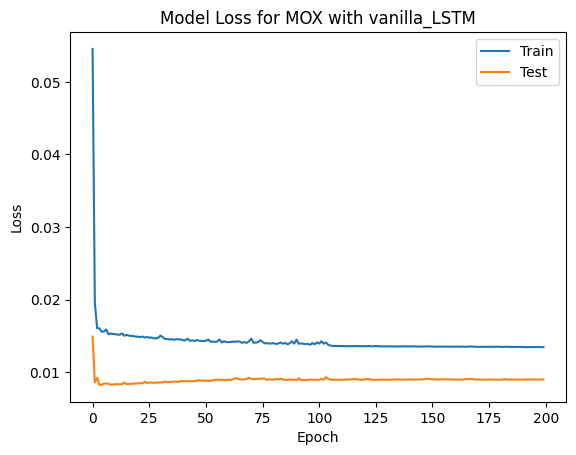

In [35]:
# Loss History

pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('Model Loss for MOX with vanilla_LSTM')
pyplot.ylabel('Loss')
pyplot.xlabel('Epoch')
pyplot.legend(['Train', 'Test'], loc='upper right')
pyplot.savefig('Mox_vanilla_LSTM.png', dpi=300)
pyplot.show()

In [36]:
y_test = test_set.iloc[timestamp:].values

cases = (test_set.values).reshape(-1, 1)
cases_scaled = sc.transform(cases)

In [37]:
# the model will predict the values on x_test
x_test = [] 
length = len(test_set)

for i in range(timestamp, length):
    x_test.append(cases_scaled[i-timestamp:i, 0])
    
x_test = np.array(x_test)
print (x_test.shape)
x_test = np.reshape(x_test, (x_test.shape[0], n_steps, 1))

(431, 108)


In [38]:
def RSE(y_true, y_predicted):
    """
    - y_true: Actual values
    - y_predicted: Predicted values
    """
    y_true = np.array(y_true)
    y_predicted = np.array(y_predicted)
    RSS = np.sum(np.square(y_true - y_predicted))

    rse = math.sqrt(RSS / (len(y_true) - 2))
    return rse

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
compilation time :  190.5078887939453
Test MAE: 3619.136
Test MSE: 23831678.000
Test RMSE: 4881.770
Test FE: 30.130
Test R2: -2.969
Test RSD: 4893.136


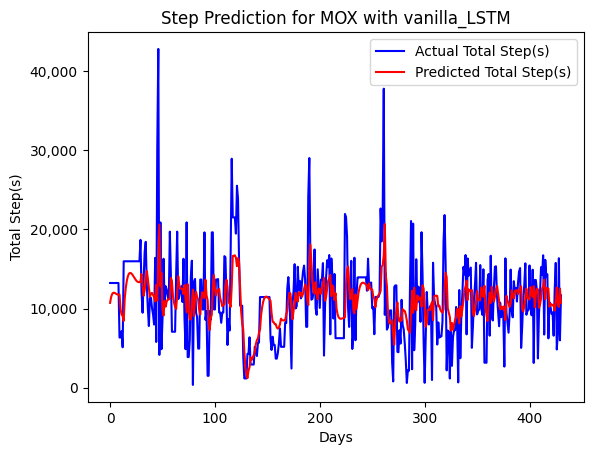

In [39]:
start = time.time()
y_pred = vanilla_LSTM.predict(x_test)
#print(y_pred)
print ('compilation time : ', (time.time() - start)*1000.0)

predicted_value = sc.inverse_transform(y_pred)
#print(predicted_value)

# calculate Metric
mae = mean_absolute_error(predicted_value, y_test)
mse = mean_squared_error(predicted_value, y_test)
rmse = sqrt(mean_squared_error(predicted_value, y_test))
forecast_error = np.mean(np.subtract(predicted_value, y_test))
#https://www.investopedia.com/terms/r/residual-standard-deviation.asp
rsd = RSE(y_test, predicted_value)

#r2_value = r2_score(predicted_value, y_test,multioutput='variance_weighted')
r2_value = r2_score(predicted_value, y_test)
print('Test MAE: %.3f' % mae)
print('Test MSE: %.3f' % mse)
print('Test RMSE: %.3f' % rmse)
print('Test FE: %.3f' % forecast_error)
print('Test R2: %.3f' % r2_value)
print('Test RSD: %.3f' % rsd)

#print (predicted_value)

# plotting the results
fig, ax = pyplot.subplots()
pyplot.plot(y_test, color = 'blue', label = 'Actual Total Step(s)')
pyplot.plot(predicted_value, color = 'red', label = 'Predicted Total Step(s)')
#plt.title('Case Prediction - mul_layer_3 Model')
#plt.xlabel('Time')
#plt.ylabel('Total Case(s)')
ax.set_xlabel('Days')
ax.set_ylabel('Total Step(s)')
ax.set_title('Step Prediction for MOX with vanilla_LSTM')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
pyplot.legend(loc='upper right')
pyplot.savefig('Mox_vanill_LSTM.png', dpi=300)
pyplot.show()

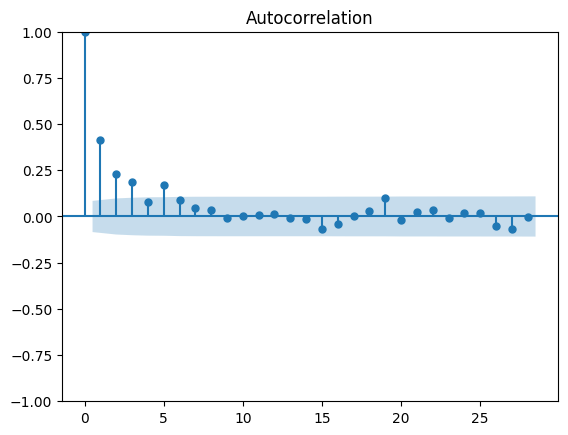

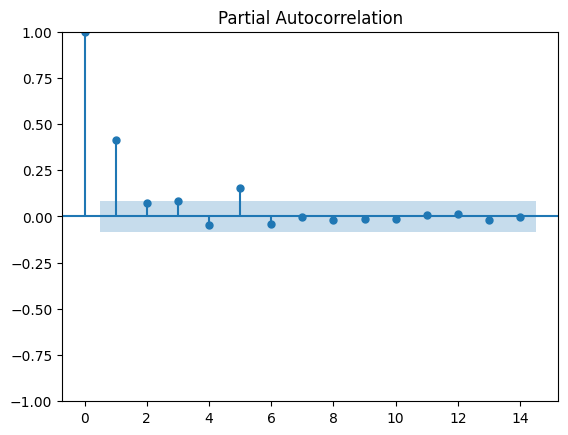

predicted=10254.228789, expected=7040.000000
predicted=10030.939191, expected=1154.000000
predicted=7121.809310, expected=7680.000000
predicted=6022.561867, expected=2759.000000
predicted=3659.240715, expected=6352.000000
predicted=6965.669660, expected=7225.000000
predicted=4751.050628, expected=7250.000000
predicted=7324.350839, expected=10194.000000
predicted=7708.244664, expected=7788.000000
predicted=7313.292397, expected=661.000000
predicted=4184.507636, expected=12339.000000
predicted=9451.319699, expected=3723.000000
predicted=5326.688009, expected=9307.000000
predicted=9746.625515, expected=12002.000000
predicted=7212.248192, expected=15266.000000
predicted=13598.214648, expected=14302.000000
predicted=11430.739718, expected=16761.000000
predicted=14210.499247, expected=6737.000000
predicted=9495.804605, expected=16331.000000
predicted=15508.955654, expected=14163.000000
predicted=12948.753814, expected=14683.000000
predicted=16076.311222, expected=15176.000000
predicted=12676

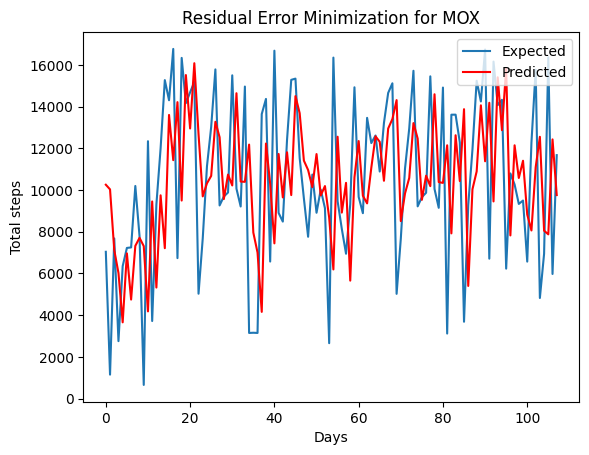

compilation time :  151.76701545715332


In [40]:
start = time.time()
#print(y_pred)

# load data
steps = df['steps'].values
#steps = df['Steps'].values
series=pd.Series(steps)

#AutoCorrelation Function
plot_acf(series)
pyplot.show()

#Partial autocorrelation function
#plot_pacf(series, lags=50)
plot_pacf(series, lags=14)
pyplot.show()

# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']

# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.8)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# persistence model on training set
train_pred = [x for x in train_X]

# calculate residuals
train_resid = [train_y[i]-train_pred[i] for i in range(len(train_pred))]

# model the training set residuals
window = 5
model = AutoReg(train_resid, lags=5)
model_fit = model.fit()
coef = model_fit.params

# walk forward over time steps in test
history = train_resid[len(train_resid)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()

for t in range(len(test_y)):
	# persistence
	yhat = test_X[t]
	error = test_y[t] - yhat
    
	# predict error
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	pred_error = coef[0]
	for d in range(window):
		pred_error += coef[d+1] * lag[window-d-1]
        
	# correct the prediction
	yhat = yhat + pred_error
	predictions.append(yhat)
	history.append(error)
	print('predicted=%f, expected=%f' % (yhat, test_y[t]))

#RSD
rsd = RSE(y_test, predicted_value)
print('Test RSD: %.3f' % rsd)
# error
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)

forecast_error = np.mean(np.subtract(predicted_value, y_test))
print('Test fe: %.3f' % forecast_error)

r2_value = r2_score(predicted_value, y_test)
print('Test r2: %.3f' % r2_value)

# plot predicted error
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.title('Residual Error Minimization for MOX')
pyplot.ylabel('Total steps')
pyplot.xlabel('Days')
pyplot.legend(['Expected', 'Predicted'], loc='upper right')
pyplot.savefig('AR_REM_MOX.png', dpi=300)
pyplot.show()

print ('compilation time : ', (time.time() - start)*1000.0)